# Vehicle ad data analysis 
### The purpose of this analysis is to better understand if theres a correlation between vehicles characteristics and days listed.

## importing necessary modules

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import altair as alt
import plotly.express as px
import seaborn as sns


## importing Dataset


In [163]:
data = pd.read_csv('/Users/deshawncouch/SDtoolsProject/vehicles_us.csv')

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [165]:
data.duplicated().sum()

0

In [166]:
data.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

### Cleaning data, removing NaN/0 values. Regarding cylinders, odometer and Model year using provided data used median amount to assume values based on model and model year.

In [ ]:
data['is_4wd']= data['is_4wd'].fillna(0)
data['is_4wd'] = data['is_4wd'].astype('bool')   
data['manufacturer']=data['model'].str.split().str[0]
data['paint_color']=data['paint_color'].fillna('unknown')
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median')) 
data['odometer'] = data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median')) 
data['cylinders'] = data['cylinders'].fillna(data.groupby(['model'])['cylinders'].transform('median'))

price  model_year                         model  condition  cylinders  \
24320  17300      2014.0  chevrolet camaro lt coupe 2d       good        6.0   
6538   14995      2013.0    chevrolet silverado 2500hd       good        8.0   
14244   9800      2008.0          ford f250 super duty       good        8.0   
19930   8999      2014.0               chevrolet cruze  excellent        4.0   
45038   6790      2008.0                   honda civic       good        4.0   
27845   6300      2012.0                 nissan sentra   like new        4.0   
46464   4950      2008.0         chevrolet trailblazer       good        6.0   
40639  20800      2007.0                      ram 2500       good        6.0   
32758   3999      2005.0                    ford focus  excellent        4.0   
26720   6995      2013.0                 nissan altima       good        4.0   

         fuel  odometer transmission    type paint_color  is_4wd date_posted  \
24320     gas   27915.0        other   coupe         red   False  2019-04-09   
6538   diesel  205000.0    automatic  pickup       white    True  2018-05-04   
14244     gas   72310.0    automatic   truck       white    True  2019-03-13   
19930     gas   56000.0    automatic   sedan         red   False  2019-01-10   
45038     gas  135399.0       manual   sedan        blue   False  2019-03-29   
27845     gas  114076.0    automatic   sedan     unknown   False  2018-11-29   
46464     gas  184029.0    automatic     SUV       black    True  2019-04-15   
40639  diesel  153000.0    automatic  pickup         red    True  2018-05-12   
32758     gas  153108.0    automatic   sedan     unknown   False  2018-07-07   
26720     gas  115222.0    automatic   sedan     unknown   False  2019-01-11   

       days_listed manufacturer  
24320            2    chevrolet  
6538            31    chevrolet  
14244           20         ford  
19930           53    chevrolet  
45038          144        honda  
27845            3       nissan  
46464           48    chevrolet  
40639           58          ram  
32758           48         ford  
26720           52       nissan

# Vehicle listing analysis

# Correlation between condition and Days listed 

### The goal here is to see how long are cars listed before they are sold

In [168]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

### It looks like most vehicles are sold around roughly 40 days!To sell cars faster the client should look to adjusting prices after the 45 day mark if vehicles have not sold.

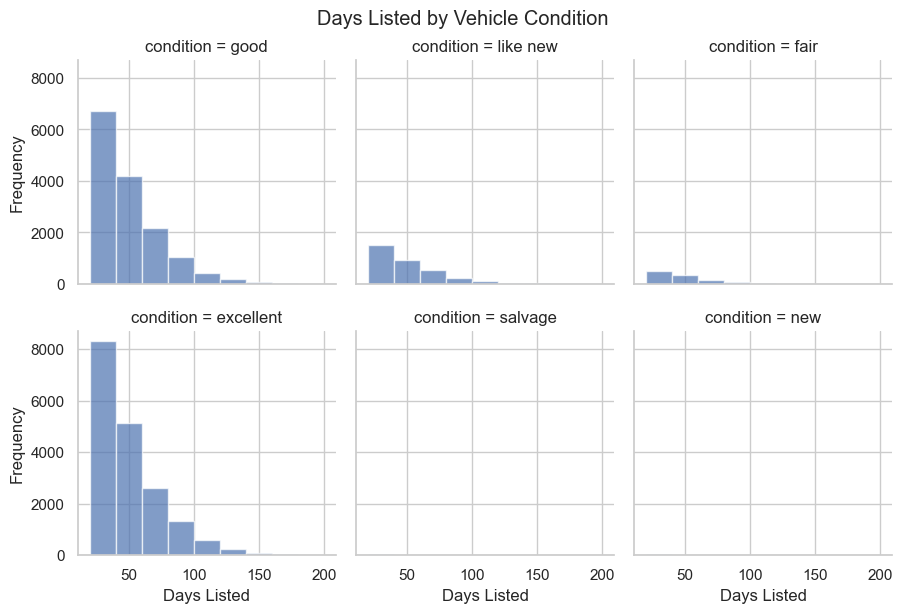

In [179]:
# histogram of days listed
g = sns.FacetGrid(data, col="condition", col_wrap=3, sharex=True, sharey=True)
g.map(plt.hist, "days_listed", bins=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], alpha=0.7)
g.set_axis_labels("Days Listed", "Frequency")
g.fig.suptitle("Days Listed by Vehicle Condition", y=1.02)
plt.show()

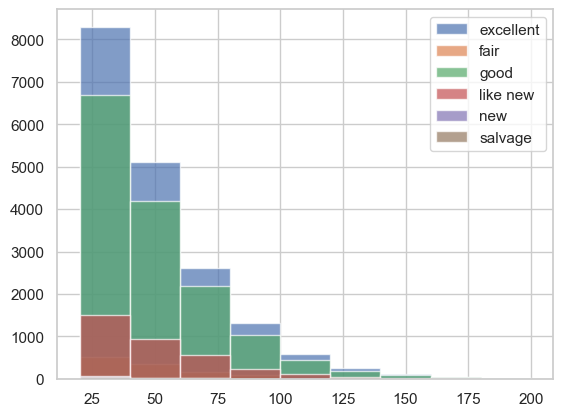

In [170]:
# Group by 'category' and create histograms for 'value'
data.groupby('condition')['days_listed'].hist(bins=[20,40,60,80,100,120,140,160,180,200],alpha=0.7, legend=True)
plt.show()

### It also appears that there is a steep decline in excellent condition vehicles as time passes. 


In [178]:
fig = px.scatter(
    data,
    x='price',
    y='days_listed',
    color='condition',
    size='price',  # Size the markers by price
    hover_data=['condition'],
    title='Scatterplot: Price vs Days Listed by Condition'
)
fig.update_layout(
    xaxis_title='Price ($)',
    yaxis_title='Days Listed'
)
fig.show()

## Based on the above it also appears that cheaper vehicles sell faster and more expensive vehicles still sell in about 40 days regardless of condiiton